Problem 7-1 \
Assignment 1 \
\
group members:
1) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697), 
2) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463), 
3) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638), 
4) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

In [3]:
# Install a pip package in the current Jupyter kernel
! pip install numpy pandas networkx matplotlib powerlaw

In [4]:
import pandas as pd
import networkx as nx
import numpy as np

#read data
paths = ['/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-7/assortativity_networks/blogs.txt', '/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-7/assortativity_networks/javax.txt', '/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-7/assortativity_networks/network-science.txt']
   

In [5]:
def generate_graph(data, plot=True):
    '''
    creates an undirected graph from a pandas dataframe with nodes connected between columns "source" and "target". If there are more than 1 links between two nodes, these are removed. 
    param data: pandas dataframe
    param plot: if True, the generated graph is plotted
    '''
    g=nx.from_pandas_edgelist(data,source='source', target='target', create_using=nx.DiGraph())
    g=g.to_undirected(reciprocal=False, as_view=False)
    print("Amount of nodes:", len(g.nodes))
    print("Amount of edges:",len(g.edges))

    #control to not having multiple edges
    for node in g.nodes(): 
        # We look for adjacent nodes
        for adj_node in g[node]: 
            # If our graph has several edges from the first to the adjacent node
            if len(g[node][adj_node]) > 1: 
                print(node, adj_node)
                break

    if plot==True:
        pos = nx.spring_layout(g, seed=1)
        nx.draw_networkx_edges(g, pos=pos)

    return g

351

In [77]:
#7.1.2
def degrree_correlation(g):
    """
    computes the degree correlation matrix
    param g: graph 
    """   

    max_degree = np.max(list(dict(g.degree).values()))#len(g.nodes())-1
    print('max_degree', max_degree)
    matrix=np.zeros((max_degree+1, max_degree+1))
    #check node by node
    for node in g.nodes():
        #degree of that node
        degree_i= len(g[node])
        for adj_node in g[node]:
            #degree of the neighbour nodes
            degree_j = len(g[adj_node])
            #update matrix 
            matrix[degree_i,degree_j]+=1
            matrix[degree_j,degree_i]+=1

    #normalization
    matrix=matrix/matrix.sum()
    return matrix


In [120]:
graph_list=[]
for id, path in zip(np.arange(len(paths)), paths):
    if id ==1:
        data = pd.read_csv(path, delimiter=' ', names=['source','target'], index_col=False)
        print(data.head())
    else:
        data = pd.read_csv(path, delimiter='\t', names=['source','target'], index_col=False)
        print(data.head())    
    g = generate_graph(data, plot=False)
    graph_list.append(g)

   source  target
0       1       2
1       1       3
2       1       4
3       1       5
4       1       6
Amount of nodes: 1224
Amount of edges: 16715
   source  target
0       1       2
1       1       3
2       1       4
3       1       5
4       1       5
Amount of nodes: 6120
Amount of edges: 50290
   source  target
0       1       2
1       1       3
2       2       4
3       2       3
4       5       6
Amount of nodes: 1461
Amount of edges: 2742


In [123]:
#7.1.3
import matplotlib.pyplot as plt 
def plot_heat_map(matrix, vmax): 
    ''''
    plots the degree correlation matrix as a heatmap.
    param matrix: degree correlation matrix
    param vmax: maximal probability
    '''
    fig, ax1 = plt.subplots()
    pos = ax1.imshow(matrix, cmap='viridis', vmin=0., vmax=vmax)
    fig.colorbar(pos, ax=ax1, label='p')
    plt.show()

max_degree 351


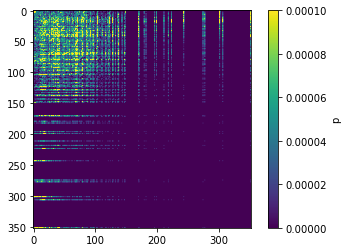

max_degree 5655


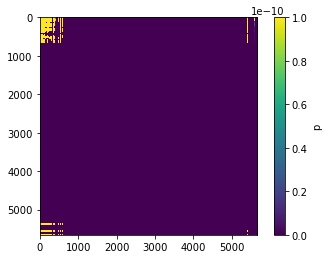

max_degree 34


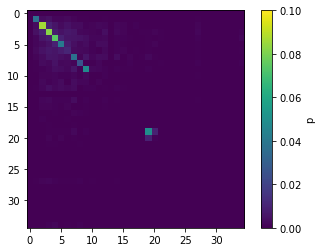

In [124]:
for g, vmax in zip(graph_list, [1e-4, 1e-10, 0.1]):
    matrix = degrree_correlation(g)
    plot_heat_map(matrix, vmax)

The blog data set generally shows that nodes are mostly connected to nodes of small degree which is a trend for dissasortativity. The javax data set only has nodes of small degree that nodes of very high degree. The nodes of small degree are connected witht the nodes of high degree which makes the network slightly dissasortive. However, also the nodes of small degree are connected to nodes of small degree. The network-science data set mainly has nodes that are connected to nodes of the same degree. Therefore hubs tend to conenct to hubs and this network is assortative. 

In [115]:
#7.1.4
def average_k(g):
    """
    creates two lists: One with the entries of degree per node, one with the entries of average degree of neighbouring ndoes.
    param g: graph 
    """
    degree=[]
    for node in g.nodes():
        #count friends
        degree.append(len(g[node]))
    average_knn_degree =  list(nx.average_neighbor_degree(g).values())
    print('average degree: ', np.mean(degree))
    print('average of average_knn_degree: ', np.mean(average_knn_degree))
    return degree, average_knn_degree

def average_knn(degree, average_knn_degree, ki):
    """
    Computes the average over all averaged neighbouring degrees of all nodes of degree ki.
    param degree: list of degrees per node
    param average_knn_degree: list of average neighbouring degrees per node
    param ki: desired ki
    """
    list_to_average=[]
    for node, degr in enumerate(degree):
        if degr==ki: 
            list_to_average.append(average_knn_degree[node])
    return np.mean(list_to_average)

In [167]:
#7.1.4
import matplotlib.pyplot as plt
def plot(degree, average_knn_degree, name):
    """
    Plot of degree distribution in log log scale. 
    param data_list: list of list of degrees
    param name_list: list of label_names
    """
    fig = plt.figure(figsize=(12, 8)) 
    ax = fig.add_subplot(1, 1, 1)

    x = np.unique(degree)
    #plotting
    ax.scatter(degree, average_knn_degree)
    for i in x:
        ax.scatter(i, average_knn(degree, average_knn_degree, i), color='red')
    ax.set_xlabel('Degree (ki)', fontsize=20)
    ax.set_ylabel('knn(ki)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.title(name, fontsize=25)

average degree:  27.312091503267975
average of average_knn_degree:  99.91155538647935
average degree:  16.434640522875817
average of average_knn_degree:  2447.7426063861417
average degree:  3.753593429158111
average of average_knn_degree:  5.053178389283797


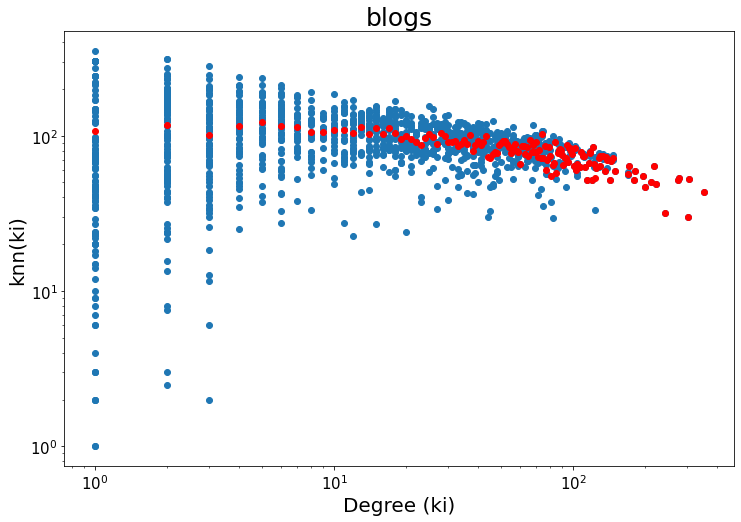

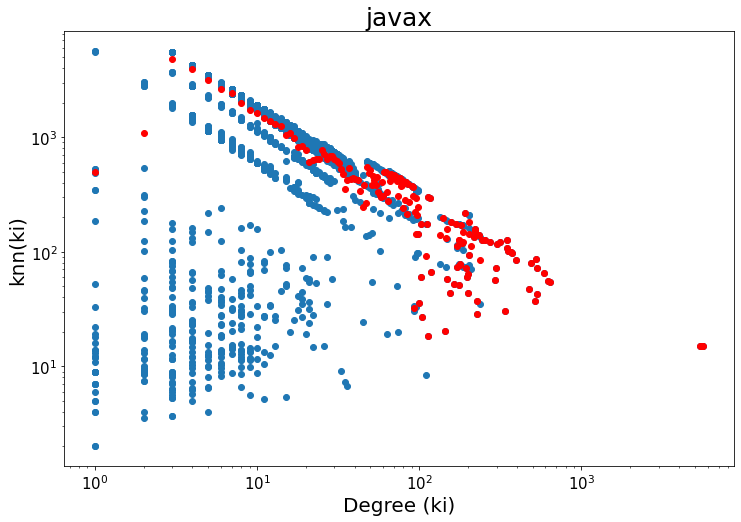

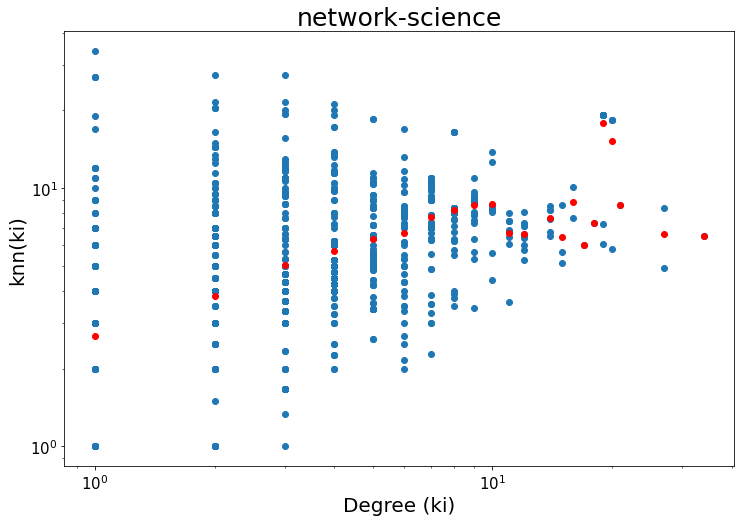

In [169]:
#7,1,4
for g, name in zip(graph_list, ['blogs', 'javax', 'network-science']):
    degree, average_knn_degree = average_k(g)
    plot(degree, average_knn_degree, name)

In analogy to the discussions if the correlation matrices, the blogs and javax data set show more or less a dissasortive (decreasing slope) behaviour and the network-science data set an assortive (increasing slope) behaviour. 

In [166]:
#7.1.6
for g, name in zip(graph_list, ['blogs', 'javax', 'network-science']):
    r = nx.degree_pearson_correlation_coefficient(g, x='out', y='in', weight=None, nodes=None)
    print(name, r)


blogs -0.22123286380455467
javax -0.2327051928360119
network-science 0.46162246675258267


Discussion:
r = 0: neutral network
r < 0: disassortative network -> javax, blogs
r > 0: assortative network -> network-science

Comparison: \
All methods show the same. However the matrix and plot leave more room for interpretations.